In [1]:
# Keiana Dunn
# Neural Network - Backp propagation - ReLu Activation Function
# Data Analysis 
# 3/16/19
# Week 7 Objective: Locate the "best" values for weights and bias with the help of 
# back propagation. The NN uses a learning rate to learn how to  Create code takes 
# 5 feature values and computes two targets based on random values for all weights 
# and biases and gives the user the option of choosing either a RELU or a sigmoid 
# function. Computation of the targets is in its own Python function and accept the 
# five features and all weights and biases as input and are output of the targets.


In [2]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

In [3]:
def FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out):    
    neuron_value_layer2R = relu((np.matmul(features, weights_in_hidden1))+ bias1.T)   
    #print('neuron_value_layer2R shape', neuron_value_layer2R.shape)
    #print('neuron_value_layer2R')
    #print(neuron_value_layer2R)
    #print('  ')
    neuron_value_layer3R = relu((np.matmul(neuron_value_layer2R, weights_in_hidden2))+ bias2.T)
    #print('neuron_value_layer3R')
    #print(neuron_value_layer3R)
    #print('  ')
    neuron_value_layer_outputR = relu((np.matmul(neuron_value_layer3R, weights_in_out))+ bias_out.T)
    #print('neuron_value_layer_outputR')
    #print(neuron_value_layer_outputR)
    #print('  ')  
    return neuron_value_layer_outputR

def loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out):    
    neuron_value_layer2R = relu((np.matmul(features, weights_in_hidden1))+ bias1.T)   
    #print('neuron_value_layer2R shape', neuron_value_layer2R.shape)
    #print('neuron_value_layer2R')
    #print(neuron_value_layer2R)
    #print('  ')
    neuron_value_layer3R = relu((np.matmul(neuron_value_layer2R, weights_in_hidden2))+ bias2.T)
    #print('neuron_value_layer3R')
    #print(neuron_value_layer3R)
    #print('  ')
    neuron_value_layer_outputR = relu((np.matmul(neuron_value_layer3R, weights_in_out))+ bias_out.T)
    #print('neuron_value_layer_outputR')
    #print(neuron_value_layer_outputR)
    #print('  ')  
    return np.sum((targets_observed-neuron_value_layer_outputR)**2)

# You should write your target function in this space
#====================================================

# Define RelU and Sigmoid activation functions

# Rectified Linear Unit (ReLU) used there is a matrix-vector product
def relu(x):
    return np.maximum(x,0)


# Calculate Sigmoid to get output values in a range of 0 to 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
        #net = Network [(5,4,3,2)]
        #Sigmoid_predictions = net.feedforward(features)
        #Relu_predictions = net.forwardfeed(features)
#=====================================================

In [15]:
# Network size
N_input = 5
N_hidden1 = 4
N_hidden2 = 3
N_output = 2

np.random.seed(51)

# Weights and Bias Initialization - first guess

# Calculate the input to the hidden layer 1 by multiplying neuron weights in hidden layer 1 by neuron weights in input 
weights_in_hidden1 = np.random.rand(N_input,N_hidden1)
# Calculate bias 1 of hidden layer 1
bias1 = np.random.rand(N_hidden1,1)

# Calculate the hidden layer 1 to the hidden layer 2 by multiplying neuron weights in hidden layer 2 by neuron weights in hidden layer 1  
weights_in_hidden2 = np.random.rand(N_hidden1,N_hidden2)
# Calculate bias 2 of hidden layer 2 
bias2 = np.random.rand(N_hidden2,1)

# Calculate the hidden layer 2 to the output layer by multiplying neuron weights from output by neuron weights in hidden layer 2
weights_in_out = np.random.rand(N_hidden2,N_output)
# Calculate the bias to output of the network
bias_out = np.random.rand(N_output,1)

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases
#np.random.shuffle(features_and_targets)
learning_rate = 0.001
number_of_epochs = 1000

#
dloss_by_dw1 = grad(loss,2)
dloss_by_db1 = grad(loss,3)
dloss_by_dw2 = grad(loss,4)
dloss_by_db2 = grad(loss,5)
dloss_by_dw3 = grad(loss,6)
dloss_by_db3 = grad(loss,7)

losses = []

for iteration in range(number_of_epochs):
    
    for i in range(22):
        # 22 feature observations 
        features = features_and_targets[i,0:5]
        # 22 target observations
        targets_observed = features_and_targets[i,5:7]
    
        #print( FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )
        
        # The assignment operator, -=, subtracts the variable to the left from the equation on right    
        weights_in_hidden1 -= learning_rate * dloss_by_dw1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias1 -= learning_rate * dloss_by_db1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        weights_in_hidden2 -= learning_rate * dloss_by_dw2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias2 -= learning_rate * dloss_by_db2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)        
        weights_in_out -= learning_rate * dloss_by_dw3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias_out -= learning_rate * dloss_by_db3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        
    losses.append(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
        
        #print(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))


for i in range(22):
    features = features_and_targets[i,0:5]
    # 22 target observations
    targets_observed = features_and_targets[i,5:7]    
    print( targets_observed, FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )

[0. 1.] [[0.         1.45957983]]
[0. 1.] [[0.         0.90565316]]
[0. 1.] [[0.         0.93544366]]
[0. 1.] [[0.         0.95880108]]
[0. 1.] [[0.         0.98996864]]
[0. 1.] [[0.         0.98855959]]
[0. 1.] [[0.         0.95876908]]
[0. 1.] [[0.         0.93541167]]
[0. 1.] [[0.        0.9042441]]
[0. 1.] [[0.         0.93403461]]
[0. 1.] [[0.         0.95739202]]
[0. 1.] [[0.         0.96520217]]
[0. 1.] [[0.         0.96661123]]
[0. 1.] [[0.         0.92901057]]
[1. 0.] [[0.98190326 0.02797833]]
[1. 0.] [[0.99598305 0.03578848]]
[1. 0.] [[1.00414731 0.        ]]
[1. 0.] [[0.99675699 0.        ]]
[1. 0.] [[1.0182271  0.00599797]]
[1. 0.] [[1.02561743 0.02935539]]
[1. 0.] [[1.00337337 0.05914589]]
[1. 0.] [[0.97451293 0.00462091]]


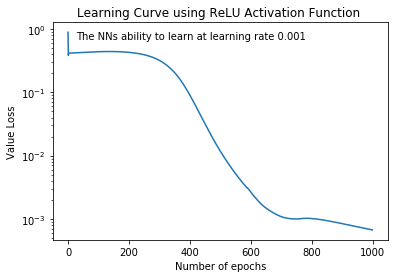

<Figure size 432x288 with 0 Axes>

In [19]:
plt.semilogy(losses) # make a plot with log scale on the y axis
plt.text(25,.7,'The NNs ability to learn at learning rate 0.001 ') # Add text on plot
plt.xlabel('Number of epochs') # Add label name
plt.title('Learning Curve using ReLU Activation Function ') # Add title name
plt.ylabel('Target Values Observed') # Add label name
plt.show() # Plot graph
plt.savefig('lrr001a.png') # Save figure

Figure 1 - At a learning rate of 0.001, the NN responded very well overall and very quickly. It shows its ability to learn quickly, plateaus for a bit, then continues to improve from 300 to 1000 epochs. The target predictions were close to the target values. This is a great learning rate because the loss values shows progress.

Rerun alorithm with new learning rate and additional epochs

In [29]:
# Network size
N_input = 5
N_hidden1 = 4
N_hidden2 = 3
N_output = 2

np.random.seed(51)

# Weights and Bias Initialization - first guess

# Calculate the input to the hidden layer 1 by multiplying neuron weights in hidden layer 1 by neuron weights in input 
weights_in_hidden1 = np.random.rand(N_input,N_hidden1)
# Calculate bias 1 of hidden layer 1
bias1 = np.random.rand(N_hidden1,1)

# Calculate the hidden layer 1 to the hidden layer 2 by multiplying neuron weights in hidden layer 2 by neuron weights in hidden layer 1  
weights_in_hidden2 = np.random.rand(N_hidden1,N_hidden2)
# Calculate bias 2 of hidden layer 2 
bias2 = np.random.rand(N_hidden2,1)

# Calculate the hidden layer 2 to the output layer by multiplying neuron weights from output by neuron weights in hidden layer 2
weights_in_out = np.random.rand(N_hidden2,N_output)
# Calculate the bias to output of the network
bias_out = np.random.rand(N_output,1)

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases
#np.random.shuffle(features_and_targets)
learning_rate = 0.001
number_of_epochs = 2000

dloss_by_dw1 = grad(loss,2)
dloss_by_db1 = grad(loss,3)
dloss_by_dw2 = grad(loss,4)
dloss_by_db2 = grad(loss,5)
dloss_by_dw3 = grad(loss,6)
dloss_by_db3 = grad(loss,7)

losses = []

for iteration in range(number_of_epochs):
    
    for i in range(22):
        # 22 feature observations 
        features = features_and_targets[i,0:5]
        # 22 target observations
        targets_observed = features_and_targets[i,5:7]
    
        #print( FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )
    
        # The assignment operator, -=, subtracts the variable to the left from the equation on right    
        weights_in_hidden1 -= learning_rate * dloss_by_dw1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias1 -= learning_rate * dloss_by_db1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        weights_in_hidden2 -= learning_rate * dloss_by_dw2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias2 -= learning_rate * dloss_by_db2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)        
        weights_in_out -= learning_rate * dloss_by_dw3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias_out -= learning_rate * dloss_by_db3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        
    losses.append(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
        
        #print(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))


for i in range(22):
    features = features_and_targets[i,0:5]
    # 22 target observations
    targets_observed = features_and_targets[i,5:7]    
    print( targets_observed, FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )

[0. 1.] [[0.         1.10248196]]
[0. 1.] [[0.         0.97631795]]
[0. 1.] [[0.         0.98540633]]
[0. 1.] [[0.         0.99712632]]
[0. 1.] [[0.         1.01121672]]
[0. 1.] [[0.         1.01072912]]
[0. 1.] [[0.         1.00164074]]
[0. 1.] [[0.         0.98992075]]
[0. 1.] [[0.         0.97583035]]
[0. 1.] [[0.         0.98491872]]
[0. 1.] [[0.         0.99663871]]
[0. 1.] [[0.         0.99900913]]
[0. 1.] [[0.         0.99949673]]
[0. 1.] [[0.         0.98803794]]
[1. 0.] [[1.00043104 0.        ]]
[1. 0.] [[1.00197642 0.        ]]
[1. 0.] [[0.9949281 0.       ]]
[1. 0.] [[0.98228594 0.        ]]
[1. 0.] [[0.99647348 0.        ]]
[1. 0.] [[1.00911564 0.00219101]]
[1. 0.] [[1.01461858 0.01127939]]
[1. 0.] [[0.98778888 0.        ]]


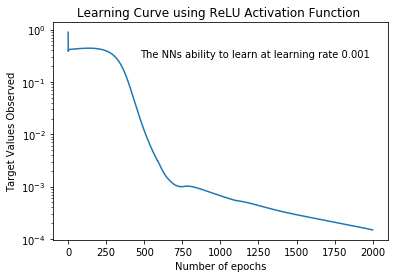

<Figure size 432x288 with 0 Axes>

In [33]:
plt.semilogy(losses) # make a plot with log scale on the y axis
plt.text(475,.3,'The NNs ability to learn at learning rate 0.001  ') # Add text on plot
plt.xlabel('Number of epochs') # Add label name
plt.title('Learning Curve using ReLU Activation Function ') # Add title name
plt.ylabel('Target Values Observed') # Add label name
plt.show() # Plot graph
plt.savefig('lrr001b.png') # Save figure

Figure 2 - With more epochs and the same learning rate of 0.001, we see that the network continues to improve. The predicted targets are even better and closer to targets after running 1000 more epoches.  

In [37]:
# Network size
N_input = 5
N_hidden1 = 4
N_hidden2 = 3
N_output = 2

np.random.seed(51)

# Weights and Bias Initialization - first guess

# Calculate the input to the hidden layer 1 by multiplying neuron weights in hidden layer 1 by neuron weights in input 
weights_in_hidden1 = np.random.rand(N_input,N_hidden1)
# Calculate bias 1 of hidden layer 1
bias1 = np.random.rand(N_hidden1,1)

# Calculate the hidden layer 1 to the hidden layer 2 by multiplying neuron weights in hidden layer 2 by neuron weights in hidden layer 1  
weights_in_hidden2 = np.random.rand(N_hidden1,N_hidden2)
# Calculate bias 2 of hidden layer 2 
bias2 = np.random.rand(N_hidden2,1)

# Calculate the hidden layer 2 to the output layer by multiplying neuron weights from output by neuron weights in hidden layer 2
weights_in_out = np.random.rand(N_hidden2,N_output)
# Calculate the bias to output of the network
bias_out = np.random.rand(N_output,1)

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases
#np.random.shuffle(features_and_targets)
learning_rate = 0.001
number_of_epochs = 20000

dloss_by_dw1 = grad(loss,2)
dloss_by_db1 = grad(loss,3)
dloss_by_dw2 = grad(loss,4)
dloss_by_db2 = grad(loss,5)
dloss_by_dw3 = grad(loss,6)
dloss_by_db3 = grad(loss,7)

losses = []

for iteration in range(number_of_epochs):
    
    for i in range(22):
        # 22 feature observations 
        features = features_and_targets[i,0:5]
        # 22 target observations
        targets_observed = features_and_targets[i,5:7]
    
        #print( FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )
    
        # The assignment operator, -=, subtracts the variable to the left from the equation on right    
        weights_in_hidden1 -= learning_rate * dloss_by_dw1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias1 -= learning_rate * dloss_by_db1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        weights_in_hidden2 -= learning_rate * dloss_by_dw2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias2 -= learning_rate * dloss_by_db2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)        
        weights_in_out -= learning_rate * dloss_by_dw3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias_out -= learning_rate * dloss_by_db3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        
    losses.append(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
        
        #print(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))


for i in range(22):
    features = features_and_targets[i,0:5]
    # 22 target observations
    targets_observed = features_and_targets[i,5:7]    
    print( targets_observed, FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )

[0. 1.] [[0.        1.0000251]]
[0. 1.] [[0.         0.99998942]]
[0. 1.] [[0.         0.99988067]]
[0. 1.] [[0.         1.00009996]]
[0. 1.] [[0.         1.00000048]]
[0. 1.] [[0.         1.00002987]]
[0. 1.] [[0.         1.00016094]]
[0. 1.] [[0.         0.99994166]]
[0. 1.] [[0.         1.00004114]]
[0. 1.] [[0.         0.99991006]]
[0. 1.] [[0.         1.00012935]]
[0. 1.] [[0.         0.99981058]]
[0. 1.] [[0.         0.99978119]]
[0. 1.] [[0.         1.00023103]]
[1. 0.] [[1.00010358 0.        ]]
[1. 0.] [[0.99977861 0.        ]]
[1. 0.] [[1.00022913 0.        ]]
[1. 0.] [[1.00000309 0.        ]]
[1. 0.] [[0.99990416 0.        ]]
[1. 0.] [[1.00013021 0.        ]]
[1. 0.] [[1.00000466 0.        ]]
[1. 0.] [[0.99987753 0.        ]]


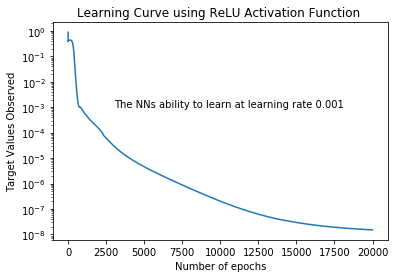

<Figure size 432x288 with 0 Axes>

In [41]:
plt.semilogy(losses) # make a plot with log scale on the y axis
plt.text(3000,.001,'The NNs ability to learn at learning rate 0.001  ') # Add text on plot
plt.xlabel('Number of epochs') # Add label name
plt.title('Learning Curve using ReLU Activation Function ') # Add title name
plt.ylabel('Target Values Observed') # Add label name
plt.show() # Plot graph
plt.savefig('lrr001c.png') # Save figure

Figure 3 - The model continues to improve. We can see from 2 to 20K epochs the predicted target values observed are spot on to the targets of 0 and 1. It is clear the .001 learning rate is ideal for reLU to perform optimially. In addition, reLU is a much better activation function in this particular situation when compared to sigmoid activation function. 